# Lithium prescribing trends in England. 

## **Background and Rationale**
For over 60 years lithium has been the gold standard for the treatment and prevention of relapse in bipolar disorder.  In recent years, published literature has confirmed the superiority of lithium in this field, including two meta-analysis of RCTs (Severus et al. 2014, Miura et al. 2014) and one of observational studies (Kessing et al 2018).  Yet in various countries, authors have described a decline in lithium use (Karanti et al. 2016), including in the UK (Hayes et al. 2011, Lyall et al. 2019) 

We wish to describe long term lithium prescribing trends in England.  Previous authors have reported regional variations in lithium use across the country (POMH Lithium report, 2008). We would like to explore these national variations in use, to further understand trends in lithium prescribing in the UK. 

## **Proposed project**
### Title:  
Lithium prescribing trends
### Description:  
* Total number of items of lithium dispensed each year from 1998 to 2018
* Total number of lithium items per 1000 patient population for each CCG
* Total number of hospital prescriptions for lithium dispensed at sample timepoints
* Total number of lithium patients registered in GPs as determined by QOF data
* Total number of DDDs of lithium dispensed each year from 2010 to 2019 



In [1]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from matplotlib.dates import DateFormatter
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps
import matplotlib.gridspec as gridspec

### Print graph of lithium use from 1998 to 2018 using PCA data

In [2]:
sql = """
SELECT
drug_name,
Chemical_code_current,
year,
items

FROM ebmdatalab.helen.trends_from_pca_final_2018new

WHERE (Chemical_code_current = "0402030K0" OR Chemical_code_current = "0402030P0")

GROUP BY
year,
drug_name,
Chemical_code_current,
items

ORDER BY
year


"""

df_lithium_pca = bq.cached_read(sql, csv_path = 'lithium_pca.csv')

In [3]:
df_lithium_pca.head(20)

,drug_name,Chemical_code_current,year,items
0,Lithium Carb_Tab Slow 400mg,0402030K0,1998,100.0
1,Camcolit 250_Tab 250mg,0402030K0,1998,42300.0
2,Camcolit 400_Tab 400mg,0402030K0,1998,32600.0
3,Liskonum_Tab 450mg,0402030K0,1998,7800.0
4,Priadel_Tab 400mg,0402030K0,1998,396700.0
5,Priadel 200_Tab 200mg,0402030K0,1998,180000.0
6,Lithonate_Tab 400mg,0402030K0,1998,5700.0
7,Litarex_Tab 564mg,0402030P0,1998,2700.0
8,Priadel_Liq 520mg/5ml S/F,0402030P0,1998,8300.0
9,Li-Liquid_Syr 10.8mmol/5ml,0402030P0,1998,600.0


In [4]:
df_lithium_pca_totalcount = df_lithium_pca.groupby(['year'], as_index=False).sum()
df_lithium_pca_totalcount.head(20)

,year,items
0,1998,677500.0
1,1999,694500.0
2,2000,714495.0
3,2001,738647.0
4,2002,752838.0
5,2003,765062.0
6,2004,780240.0
7,2005,786166.0
8,2006,793642.0
9,2007,810086.0


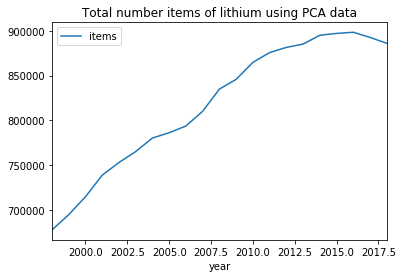

In [5]:
plot1 = df_lithium_pca.groupby("year").sum().plot(kind='line', title="Total number items of lithium using PCA data")

## Describe total lithium dispensed using monthly practice level data from 2010 to 2019

In [6]:
sql2 = """
WITH
bnf_tab AS (
SELECT
DISTINCT chemical,
chemical_code
FROM
ebmdatalab.hscic.bnf )
SELECT
rx.month,
rx.practice,
rx.pct,
SUBSTR(rx.bnf_code,1,9) AS chemical_code,
chemical,
sum(IF(rx.bnf_code LIKE "0402030K0%", items,0)) AS carbonate,
sum(IF(rx.bnf_code LIKE "0402030P0%", items,0)) AS citrate,
sum(items) AS total_lithium,
sum(actual_cost) AS total_cost
FROM
hscic.normalised_prescribing_standard AS rx
LEFT JOIN
bnf_tab
ON
chemical_code =SUBSTR(rx.bnf_code,1,9)
JOIN
hscic.practices AS prac
ON
rx.practice = prac.code 
JOIN
  hscic.ccgs AS ccgs
ON
rx.pct=ccgs.code
WHERE
  prac.setting = 4
  AND (bnf_code LIKE "0402030K0%" OR ##carbonate
  bnf_code LIKE "0402030P0%") ##citrate
  AND
ccgs.org_type='CCG'
GROUP BY
rx.month,
rx.practice,
rx.pct,
chemical_code,
chemical
ORDER BY
month"""

df_lithium = bq.cached_read(sql2, csv_path='lithium.csv')

In [7]:
df_lithium['month'] = df_lithium['month'].astype('datetime64[ns]')
df_lithium.head()

,month,practice,pct,chemical_code,chemical,carbonate,citrate,total_lithium,total_cost
0,2010-08-01,H81019,09Y,0402030K0,Lithium Carbonate,7,0,7,27.23
1,2010-08-01,G81029,09F,0402030K0,Lithium Carbonate,25,0,25,46.04
2,2010-08-01,B81077,03H,0402030K0,Lithium Carbonate,5,0,5,7.97
3,2010-08-01,F85063,08D,0402030K0,Lithium Carbonate,12,0,12,40.90
4,2010-08-01,H85053,08T,0402030K0,Lithium Carbonate,8,0,8,2.73


In [8]:
df_lithium["chemical"].unique()#shows me the unique values within the chemical column

array(['Lithium Carbonate', 'Lithium Citrate'], dtype=object)

In [9]:
df_lithium.nunique()#counts the number of unique items in each column.  

month               110
practice           8022
pct                 191
chemical_code         2
chemical              2
carbonate           136
citrate              35
total_lithium       135
total_cost       190699
dtype: int64

In [10]:
df_carbonate = df_lithium.loc[df_lithium["chemical"] == "Lithium Carbonate"]
df_carbonate.head()#shows me the data for Lithium Carbonate

,month,practice,pct,chemical_code,chemical,carbonate,citrate,total_lithium,total_cost
0,2010-08-01,H81019,09Y,0402030K0,Lithium Carbonate,7,0,7,27.23
1,2010-08-01,G81029,09F,0402030K0,Lithium Carbonate,25,0,25,46.04
2,2010-08-01,B81077,03H,0402030K0,Lithium Carbonate,5,0,5,7.97
3,2010-08-01,F85063,08D,0402030K0,Lithium Carbonate,12,0,12,40.90
4,2010-08-01,H85053,08T,0402030K0,Lithium Carbonate,8,0,8,2.73


In [11]:
df_citrate = df_lithium.loc[df_lithium["chemical"] == "Lithium Citrate"]
df_citrate.head()#shows me the data for Lithium Citrate

,month,practice,pct,chemical_code,chemical,carbonate,citrate,total_lithium,total_cost
79,2010-08-01,C84605,04N,0402030P0,Lithium Citrate,0,1,1,5.36
90,2010-08-01,P81103,01E,0402030P0,Lithium Citrate,0,2,2,26.39
100,2010-08-01,G83001,08A,0402030P0,Lithium Citrate,0,1,1,42.66
111,2010-08-01,C88079,03N,0402030P0,Lithium Citrate,0,1,1,10.36
127,2010-08-01,N81046,02F,0402030P0,Lithium Citrate,0,2,2,44.80


In [12]:
ccg_lithium_totalcount = df_lithium.groupby(["month", "pct"], as_index=False).sum()
ccg_lithium_totalcount.tail()#shows me the data grouped by PCT, therefore representing CCGs

,month,pct,carbonate,citrate,total_lithium,total_cost
21005,2019-09-01,99H,364,2,366,1083.79398
21006,2019-09-01,99J,600,3,603,1216.91034
21007,2019-09-01,99K,221,5,226,530.90471
21008,2019-09-01,99M,234,1,235,783.96083
21009,2019-09-01,99N,668,8,676,1346.09597


In [13]:
ccg_lithium_totalcount.describe()

,carbonate,citrate,total_lithium,total_cost
count,21010.000000,21010.000000,21010.000000,21010.000000
mean,375.297668,3.816564,379.114231,691.242443
std,300.596623,4.707237,304.017283,600.048727
min,27.000000,0.000000,27.000000,49.340000
25%,201.000000,1.000000,203.000000,337.285000
50%,290.000000,2.000000,293.000000,509.399650
75%,446.000000,5.000000,450.000000,822.431118
max,2147.000000,54.000000,2167.000000,5321.818920


### Display total no. of items dispensed per year

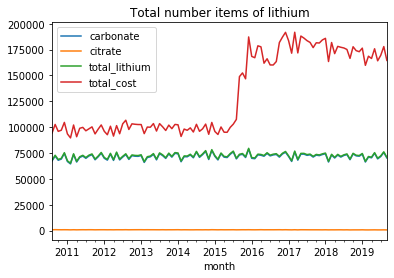

In [14]:
plot2 = df_lithium.groupby("month").sum().plot(kind='line', title="Total number items of lithium")

(40000, 100000)

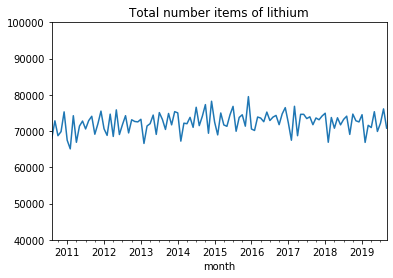

In [15]:
plot3 = df_lithium.groupby("month")['total_lithium'].sum().plot(kind='line', title="Total number items of lithium")
plt.ylim(40000, 100000)

In [16]:
## Check data by testing if annual sum of monthly practice level data is similar to annual PCA numbers
## 2011 data  
mask1 = (df_lithium['month'] >= "2011-01-01") & (df_lithium['month'] <= "2011-12-31")
df_annual2011 = df_lithium.loc[mask1]
df_annual2011.sum()

carbonate         843084.00
citrate             8975.00
total_lithium     852059.00
total_cost       1163009.88
dtype: float64

In [17]:
## 2012 data
mask2 = (df_lithium['month'] >= "2012-01-01") & (df_lithium['month'] <= "2012-12-31")
df_annual2012 = df_lithium.loc[mask2]
df_annual2012.sum()

carbonate         852271.00
citrate             9102.00
total_lithium     861373.00
total_cost       1191985.08
dtype: float64

In [18]:
## 2013 data
mask3 = (df_lithium['month'] >= "2013-01-01") & (df_lithium['month'] <= "2013-12-31")
df_annual2013 = df_lithium.loc[mask3]
df_annual2013.sum()

carbonate         858394.0
citrate             9123.0
total_lithium     867517.0
total_cost       1199330.7
dtype: float64

In [19]:
## 2014 data
mask4 = (df_lithium['month'] >= "2014-01-01") & (df_lithium['month'] <= "2014-12-31")
df_annual2014 = df_lithium.loc[mask4]
df_annual2014.sum()

carbonate         869562.00
citrate             8809.00
total_lithium     878371.00
total_cost       1180384.94
dtype: float64

In [20]:
## 2015 data
mask5 = (df_lithium['month'] >= "2015-01-01") & (df_lithium['month'] <= "2015-12-31")
df_annual2015 = df_lithium.loc[mask5]
df_annual2015.sum()

carbonate         870857.00
citrate             8934.00
total_lithium     879791.00
total_cost       1424320.74
dtype: float64

In [21]:
## 2016 data
mask6 = (df_lithium['month'] >= "2016-01-01") & (df_lithium['month'] <= "2016-12-31")
df_annual2016 = df_lithium.loc[mask6]
df_annual2016.sum()

carbonate         871064.00
citrate             9037.00
total_lithium     880101.00
total_cost       2063903.53
dtype: float64

In [22]:
## 2017 data
mask7 = (df_lithium['month'] >= "2017-01-01") & (df_lithium['month'] <= "2017-12-31")
df_annual2017 = df_lithium.loc[mask7]
df_annual2017.sum()

carbonate        8.660520e+05
citrate          8.574000e+03
total_lithium    8.746260e+05
total_cost       2.182405e+06
dtype: float64

In [23]:
#add in timelines to show publication of NICE 2014 guidance.
#df_nice = 
#plt.plot(df_nice['month'], 'r--')
#plt.show()

### Describe no. of lithium items per 1000 patients in each CCG to show Geographical Variation

In [24]:
##get list size info.  Note this will restrict the data to Oct 2014 onwards because of the practice_statistics database which only goes back to Oct 2014.
sql3 = """
SELECT month, 
pct_id AS pct,
AVG(total_list_size) AS list_size
FROM ebmdatalab.hscic.practice_statistics 
group by 
month, pct
order by
month, pct,
list_size
"""
df_list = bq.cached_read(sql3, csv_path='df_list.csv')
df_list['month'] = df_list['month'].astype('datetime64[ns]')
df_list.head(-20)

,month,pct,list_size
0,2014-10-01,NaN,0.000000
1,2014-10-01,00C,7616.000000
2,2014-10-01,00D,5662.509804
3,2014-10-01,00F,6102.176471
4,2014-10-01,00G,8058.750000
...,...,...,...
13373,2019-09-01,11X,8965.030769
13374,2019-09-01,12D,10577.434783
13375,2019-09-01,12F,6763.060000
13376,2019-09-01,13T,8666.229508


In [25]:
ccg_lithium_count = df_lithium.groupby(["month", "pct"])["total_lithium"].sum().reset_index()
ccg_lithium_count.head(-20)

,month,pct,total_lithium
0,2010-08-01,00C,333
1,2010-08-01,00D,496
2,2010-08-01,00J,456
3,2010-08-01,00K,295
4,2010-08-01,00L,595
...,...,...,...
20985,2019-09-01,11N,1007
20986,2019-09-01,11X,619
20987,2019-09-01,12D,224
20988,2019-09-01,12F,750


In [56]:
#merge dataframes to show items per 1000

df_lithium_per1000 = pd.merge(ccg_lithium_totalcount, df_list, on=['month', 'pct'])
df_lithium_per1000['items_per_1000'] = round(1000* (df_lithium_per1000['total_lithium']/df_lithium_per1000['list_size']),0)
df_lithium_per1000.head(-20)

,month,pct,carbonate,citrate,total_lithium,total_cost,list_size,items_per_1000
0,2014-10-01,00C,376,5,381,267.93000,7616.000000,50.0
1,2014-10-01,00D,636,3,639,519.49000,5662.509804,113.0
2,2014-10-01,00J,603,4,607,512.11000,6094.536585,100.0
3,2014-10-01,00K,308,2,310,425.18000,6354.130435,49.0
4,2014-10-01,00L,722,6,728,1425.31000,6852.085106,106.0
...,...,...,...,...,...,...,...,...
11039,2019-09-01,11N,1003,4,1007,2439.90806,9708.200000,104.0
11040,2019-09-01,11X,610,9,619,1328.32173,8965.030769,69.0
11041,2019-09-01,12D,222,2,224,495.64458,10577.434783,21.0
11042,2019-09-01,12F,747,3,750,1283.15980,6763.060000,111.0


In [57]:
df_lithium_per1000['month'] = df_lithium_per1000['month'].astype('datetime64[ns]')

In [58]:
df_lithium_per1000.describe()

,carbonate,citrate,total_lithium,total_cost,list_size,items_per_1000
count,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000,11064.000000
mean,347.860177,3.344089,351.204266,779.409003,7953.832679,45.906905
std,241.358996,4.033228,243.674721,588.525283,1962.515474,32.186258
min,40.000000,0.000000,40.000000,74.530000,3682.023810,3.000000
25%,198.000000,1.000000,200.000000,394.531682,6548.007177,27.000000
50%,282.000000,2.000000,285.000000,624.929300,7733.210884,39.000000
75%,430.000000,4.000000,435.000000,963.607722,9241.958333,56.000000
max,1996.000000,45.000000,2007.000000,4827.678090,16296.600000,316.000000


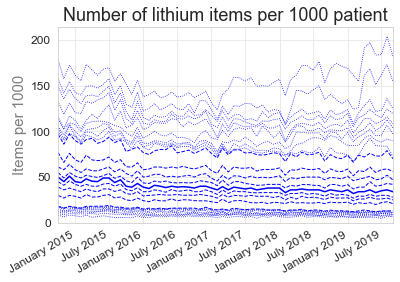

In [29]:
#create sample deciles

charts.deciles_chart(
        df_lithium_per1000,
        period_column='month',
        column='items_per_1000',
        title="Number of lithium items per 1000 patient",
        ylabel='Items per 1000',
        show_outer_percentiles=True,
        show_legend=False,
)

plt.show()

In [50]:
##Restrict to one month to create a map - Jan2019
df_lithium_inJan19 = df_lithium_per1000.loc[(df_lithium_per1000['month'] == '2019-01-01')]
df_lithium_inJan19.head()

,month,pct,carbonate,citrate,total_lithium,total_cost,list_size,items_per_1000
9351,2019-01-01,00C,346,0,346,349.49921,9875.000000,35.0
9352,2019-01-01,00D,572,7,579,773.19874,7911.189189,73.0
9353,2019-01-01,00J,486,0,486,713.99498,8748.966667,56.0
9354,2019-01-01,00K,266,3,269,894.21117,9036.939394,30.0
9355,2019-01-01,00L,761,2,763,2877.72280,7774.619048,98.0


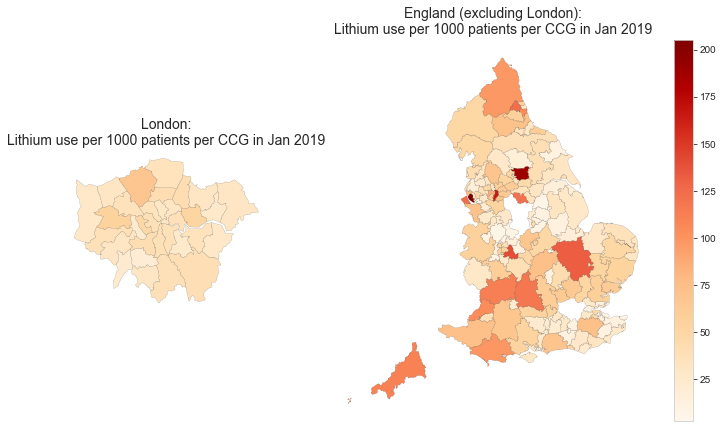

In [51]:
#create choropeth map showing recent prescribing variation (Jan 2019)
plt.figure(figsize=(12, 7))
plt = maps.ccg_map(df_lithium_inJan19, title="Lithium use per 1000 patients per CCG in Jan 2019", column='items_per_1000', separate_london=True)
plt.show()

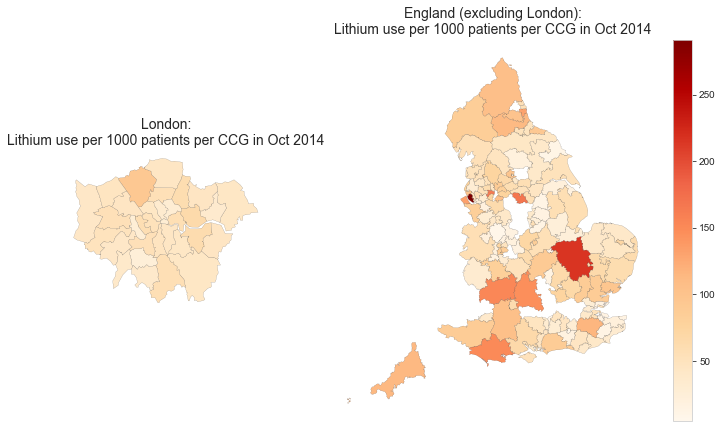

In [52]:
#create choreopath map showing prescribing variation prior to NICE implementation (Oct2015)
df_lithium_inOct14 = df_lithium_per1000.loc[(df_lithium_per1000['month'] == '2014-10-01')]
plt.figure(figsize=(12, 7))
plt = maps.ccg_map(df_lithium_inOct14, title="Lithium use per 1000 patients per CCG in Oct 2014", column='items_per_1000', separate_london=True)
plt.show()

## Show change in CCG prescribing rates from 2014 to 2019

In [60]:
df_lithium_per1000.head()

,month,pct,carbonate,citrate,total_lithium,total_cost,list_size,items_per_1000
0,2014-10-01,00C,376,5,381,267.93,7616.000000,50.0
1,2014-10-01,00D,636,3,639,519.49,5662.509804,113.0
2,2014-10-01,00J,603,4,607,512.11,6094.536585,100.0
3,2014-10-01,00K,308,2,310,425.18,6354.130435,49.0
4,2014-10-01,00L,722,6,728,1425.31,6852.085106,106.0


In [65]:
#extract year from date time for each line
df_lithium_per1000["year"] = df_lithium_per1000['month'].dt.year

df_lithium_per1000.head()

,month,pct,carbonate,citrate,total_lithium,total_cost,list_size,items_per_1000,year
0,2014-10-01,00C,376,5,381,267.93,7616.000000,50.0,2014
1,2014-10-01,00D,636,3,639,519.49,5662.509804,113.0,2014
2,2014-10-01,00J,603,4,607,512.11,6094.536585,100.0,2014
3,2014-10-01,00K,308,2,310,425.18,6354.130435,49.0,2014
4,2014-10-01,00L,722,6,728,1425.31,6852.085106,106.0,2014


In [66]:
df_lithium_per1000.groupby('year').sum()

,carbonate,citrate,total_lithium,total_cost,list_size,items_per_1000
year,,,,,,
2014,186967,1796,188763,2.531171e+05,3.578716e+06,29813.0
2015,739624,7281,746905,1.218064e+06,1.512932e+07,112017.0
2016,742500,7402,749902,1.781372e+06,1.704363e+07,99120.0
2017,749984,7383,757367,1.912656e+06,1.777016e+07,96351.0
2018,797916,7474,805390,1.958585e+06,1.922558e+07,97050.0
2019,631734,5663,637397,1.499587e+06,1.525379e+07,73563.0


In [79]:
df_lithium_per1000.groupby(["year", "pct"]).sum() #note this will show annual items per 1000 for each PCT

carbonate  citrate  total_lithium   total_cost      list_size  \
year pct                                                                  
2014 00C       1135       15           1150    798.85000   22848.000000   
     00D       1872        9           1881   1541.40000   16987.529412   
     00J       1708       11           1719   1526.58000   18283.609756   
     00K        847        6            853   1175.42000   19062.391304   
     00L       2065       26           2091   3683.26000   20556.255319   
...             ...      ...            ...          ...            ...   
2019 99H       2921       13           2934   9813.90256   92541.966667   
     99J       5629       37           5666  11225.32047   78892.837959   
     99K       2261       45           2306   5489.68734   80987.421053   
     99M       2139        6           2145   6338.78538  100862.233333   
     99N       6179       83           6262  12968.38044   92163.043793   

          items_per_1000  
year pct                  
2014 00C           151.0  
     00D           333.0  
     00J           282.0  
     00K           134.0  
     00L           305.0  
...                  ...  
2019 99H           285.0  
     99J           647.0  
     99K           255.0  
     99M           191.0  
     99N           611.0  

[1108 rows x 6 columns]

In [74]:
df_table = df_lithium_per1000[["pct","year","total_lithium", "items_per_1000"]].groupby(["pct","year"])['items_per_1000'].sum()
#yr2 = yr2.reset_index().merge(pop[["practice","month","total_list_size"]], on=["practice","month"]).groupby(["pct","month","year"]).sum()
#yr2.head()
df_table = df_table.reset_index()
df_table.head(10)

,pct,year,items_per_1000
0,00C,2014,151.0
1,00C,2015,546.0
2,00C,2016,449.0
3,00C,2017,420.0
4,00C,2018,418.0
5,00C,2019,300.0
6,00D,2014,333.0
7,00D,2015,1248.0
8,00D,2016,1034.0
9,00D,2017,997.0


### Show example of monthly items of lithium from hospital FP10s to check if bias caused by significant secondary care prescribing.  Jan 2019 chosen as example.

In [42]:
sql4 = """
SELECT 
month, 
bnf_code, 
trust_code, 
trust_name, 
items 

FROM ebmdatalab.hscic.prescribing_hospital_community_201901

WHERE (bnf_code LIKE '0402030K0%' OR bnf_code LIKE '0402030P0%')

GROUP BY
month,
bnf_code,
trust_code,
trust_name,
items

ORDER BY
month

"""

df_hospJan19_lithium = bq.cached_read(sql4, csv_path = 'hospJan19_lithium.csv')

Downloading: 100%|██████████| 397/397 [00:01<00:00, 232.86rows/s]


In [43]:
df_hospJan19_lithium.head(20)

,month,bnf_code,trust_code,trust_name,items
0,201901,0402030K0AAACAC,RRK00,UNIV HPL B/HAM NHS FOUNDATION TRUST,1.0
1,201901,0402030K0AAACAC,RT500,LEICESTERSHIRE PARTNERSHIP NHS TRUST,1.0
2,201901,0402030K0AAACAC,RHA00,NOTTINGHAMSHIRE HEALTHCARE NHS F TRUST,1.0
3,201901,0402030K0AAACAC,RRE00,MIDLANDS P/SHIP NHS FOUNDATION TRUST,1.0
4,201901,0402030K0AAACAC,RRQ00,CAMDEN & ISLINGTON NHS FOUNDATION TRUST,1.0
5,201901,0402030K0AAACAC,RWK00,EAST LONDON NHS FOUNDATION TRUST,1.0
6,201901,0402030K0AAACAC,RT200,PENNINE CARE NHS FOUNDATION TRUST,2.0
7,201901,0402030K0AAACAC,RXT00,B'HAM & S'HULL MH NHS FOUNDATION TRUST,1.0
8,201901,0402030K0AAACAC,RXV00,GREATER MANCHESTER MENTAL HEALTH NHS FT,1.0
9,201901,0402030K0AAAFAF,R1L00,ESSEX PARTNERSHIP UNIVERSITY NHS FT,1.0


In [48]:
df_hospJan19_lithium.sum()

month                                                  80154697
bnf_code      0402030K0AAACAC0402030K0AAACAC0402030K0AAACAC0...
trust_code    RRK00RT500RHA00RRE00RRQ00RWK00RT200RXT00RXV00R...
trust_name    UNIV HPL B/HAM NHS FOUNDATION TRUSTLEICESTERSH...
items                                                       934
dtype: object

### Extract data from QOF to show no. of lithium patients per CCG as determined by QOF denominators for lithium measures.

In [35]:
sql5 = """
SELECT 
year, 
practice_id, 
indicator, 
denominator, 
exceptions

FROM `ebmdatalab.qof.achievement` 

WHERE indicator = 'MH010' #The % of pts on lithium with a record of lithium levels in the therapeutic range in the preceding 4 months

GROUP BY
year, 
practice_id,
indicator,
denominator,
exceptions

ORDER BY
year

"""

df_qof = bq.cached_read(sql5, csv_path='df_qof.csv')

In [36]:
df_qof.head()

,year,practice_id,indicator,denominator,exceptions
0,1516,E82613,MH010,0,NaN
1,1516,J82199,MH010,0,NaN
2,1516,Y04942,MH010,0,NaN
3,1516,Y05167,MH010,0,NaN
4,1516,E82630,MH010,1,NaN


In [37]:
df_qof['totalpts'] = (df_qof['denominator'] + df_qof['exceptions'])
df_qof.tail()

,year,practice_id,indicator,denominator,exceptions,totalpts
28883,1819,J82155,MH010,39,7.0,46.0
28884,1819,H82034,MH010,17,8.0,25.0
28885,1819,G82021,MH010,4,9.0,13.0
28886,1819,N81029,MH010,14,9.0,23.0
28887,1819,M88004,MH010,23,10.0,33.0


In [38]:
df_qof.groupby('year').sum()

,denominator,exceptions,totalpts
year,,,
1516,43615,4568.0,48150.0
1617,42492,4343.0,46779.0
1718,41248,4228.0,45426.0
1819,40530,4138.0,44612.0


(20000, 50000)

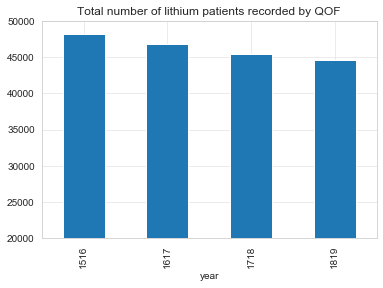

In [39]:
# Generate graph showing change in QOF patient numbers over time 
plot1 = df_qof.groupby("year")['totalpts'].sum().plot(kind='bar', title="Total number of lithium patients recorded by QOF")
plt.ylim(20000, 50000)

### Compare 2018/9 QOF data (no of lithium patients per practice) with Monthly Practice level data (no of lithium items dispensed per practice)

In [40]:
#First convert monthly practice level data into annual figures
## Apr2018-Mar2019 data
mask8 = (df_lithium['month'] >= "2018-04-01") & (df_lithium['month'] <= "2019-03-01")
df_annual1819 = df_lithium.loc[mask8]
df_annual1819.head()

,month,practice,pct,chemical_code,chemical,carbonate,citrate,total_lithium,total_cost
684882,2018-04-01,J82207,10X,0402030K0,Lithium Carbonate,13,0,13,23.47747
684883,2018-04-01,G82218,09J,0402030K0,Lithium Carbonate,9,0,9,22.31860
684884,2018-04-01,B82049,03D,0402030K0,Lithium Carbonate,15,0,15,22.49109
684885,2018-04-01,F86004,08W,0402030K0,Lithium Carbonate,19,0,19,16.52346
684886,2018-04-01,H82047,09H,0402030K0,Lithium Carbonate,4,0,4,6.64457


In [41]:
#Next refine QOF data to only include 1819 figures
df_qof1819 = df_qof.loc[df_qof["year"] == "1819"]
df_qof1819.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,year,practice_id,indicator,denominator,exceptions,totalpts


### Describe the no of DDDs or average quantity in each lithium item.  Has this changed over time?